### Load dependencies
(this step can be slow)

In [2]:
from mnfinder import MNClassifier
from tifffile import tifffile
from matplotlib import pyplot as plt
from pathlib import Path
from skimage.color import label2rgb

#### List available ML models

In [3]:
MNClassifier.get_available_models()

['Attention', 'Combined', 'LaplaceDeconstruction', 'MSAttention']

#### Import your image
Copy and paste the path to your image between the quotes
    If you navigate to your image and left and right click on the name, there should be an option to "copy path"

In [4]:
image = tifffile.imread("/Users/ehatch/Desktop/Results/mnfinder_test/hatch-lab mnfinder main src-mnfinder_test-data/2023-05-31_misc/images/1_RPE1_20x.tif")

You can visualize your image to make sure it is what you expect (false colored based on intensity)

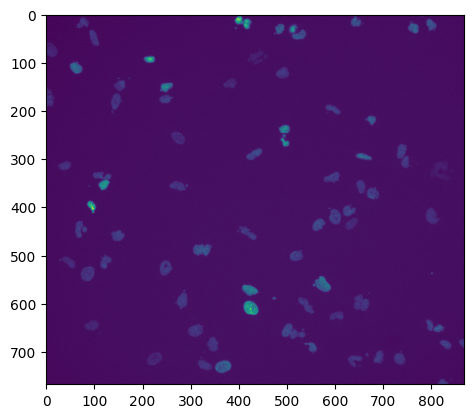

In [5]:
plt.imshow(image)

#### Load the classifier models
This step can be slow

In [6]:
classifier = MNClassifier.get_model()

### Analyze your image
This step is also slow. On my sad laptop it took 2.5 minutes to analyze a 869x768 px image. If yours is taking over 5 minutes, it can help to stop it running, then re run the previous block before restarting the analysis.

In [7]:
labels = classifier.predict(image)
# labels = classifier.predict(image, skip_opening=False, expand_masks=False, area_thresh=500)

Visualize your analysis of nuclei!

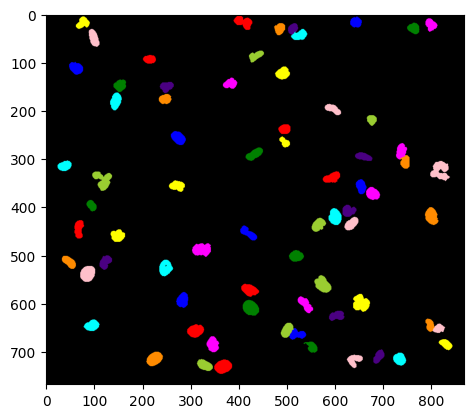

In [8]:
plt.imshow(label2rgb(labels[...,0]))

Visualize your analysis of micronuclei!

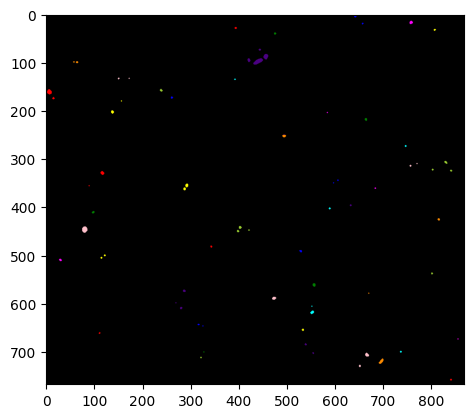

In [9]:
plt.imshow(label2rgb(labels[...,1]))

Save the analysis masks. Path/name.tif in quotes.

In [12]:
tifffile.imwrite('labels.tif', labels)

Collect the label data into two data frames - one for MN that are within 25 pixels of nuclei, one for all nuclei.

In [13]:
mn_df, nuc_df = MNClassifier.get_label_data(labels)

Export the data frames

In [18]:
mn_df.to_csv('/Users/ehatch/Desktop/Results/mnfinder_test/test_image_MN.csv')
nuc_df.to_csv('/Users/ehatch/Desktop/Results/mnfinder_test/test_image_Nuclei.csv')

### Ways to adjust or change the analysis

1. Change the model from the default ('Combined') to a specific classifier. Options are 'Attention' or 'MSAttention' 

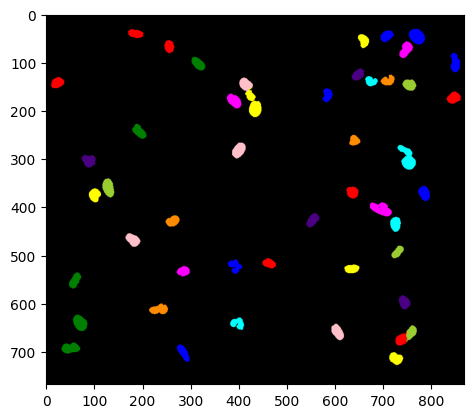

In [20]:
attention_model = MNClassifier.get_model('Attention')
labels_2 = attention_model.predict(image)
plt.imshow(label2rgb(labels_2[...,0]))

2. MNFinder uses some post-processing to increase prediction accuracy, especially for large MN and to increase mIOU. These include binary opening (to sharpen edges?), class switching (very small nuclei are recoded as MN), and mask expansion (MN masks are expanded to fill connected pixels). These steps can be skipped or adjusted. The minimum threshold for the nucleus area (px) can also be set . 

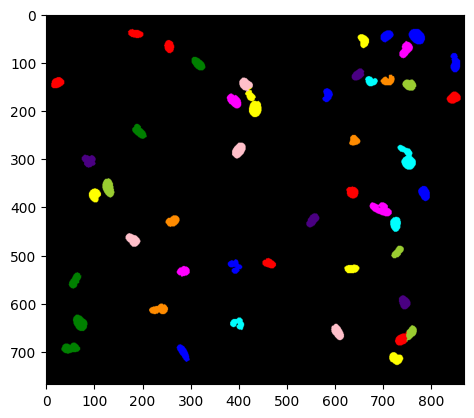

In [23]:
labels_3 = classifier.predict(image, skip_opening=False, expand_masks=False, area_thresh=500)
plt.imshow(label2rgb(labels_3[...,0]))